In [103]:
import requests

# Assignment introduction

**Overview**
This is the first mandatory assignment in which you will implement an affine regression model to estimate where a person is looking (this is known as _gaze_) from images of eyes.
Carefully read through the entire assignment to get an overview of the problem and the tasks before solving the assignment.
Refer to the bottom of the page for **submission details**.
**Note:** **Important!** Complete all tasks marked with **high (red)** priority before attempting to solve the others, as they are optional. Optional tasks and further analysis can help improve results, but feel free to explore methods and data as you choose.


The assignment builds on the Data preprocessing
 exercise. It uses the data in the `sessions`
 folder both `test_subject_0`
, `test_subject_1`
 as well as your own collected data.
The assignment has multiple steps:
1. Train gaze estimation models using data from `test_subject_0`
 training set.    - Test the models using `test_subject_0`
 test set.
    - Test the models using `test_subject_1`
.


2. Train gaze estimation models using data from `test_subject_1`
, `grid`
.    - Test the models using `test_subject_1`
. 


3. Train gaze estimtion models using your own data set. 


**Note**
The steps contains repeated elements, but duplicate code to keep results in each cell asociated to each step. This makes it easier to review during the exam.
Most visualization and data processing code is located in `iml_util.py`
, but you're not expected to explain it. Focus on the code provided in the assignment.

<div style="float: none; width: 100%; justify-content: start" class="block is-clearfix">

**Note:** The location of the _fovea_ on the retina varies between people ($\pm$ 5 degrees). Consequently, a gaze model has to be trained (calibrated) for a specific person to be accurate. This difference is shown in [Figure 1](#kappa).

## Gaze Estimation introduction
Gaze estimation is performed by capturing images of a user's eye as shown in [Figure 2](#model) and mapping them to screen positions using a function $f_\mathbf{w}(x, y)$. Humans look at things by orienting their eyes so that the light from the point of focus hits the _Fovea_ (a point on the retina). The Fovea is not directly aligned with the center of the pupil, but at a person-specific angle, as shown in [Figure 1](#kappa). The pupil position can be used to infer gaze, but to obtain accurate gaze estimates requires training data (called calibration).


</div>

<div style="float: none; width: 100%; justify-content: start" class="block is-clearfix">



</div>


<div style="float: none; width: 100%; justify-content: start" class="block is-clearfix">

<div style="float: left; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" id="kappa">

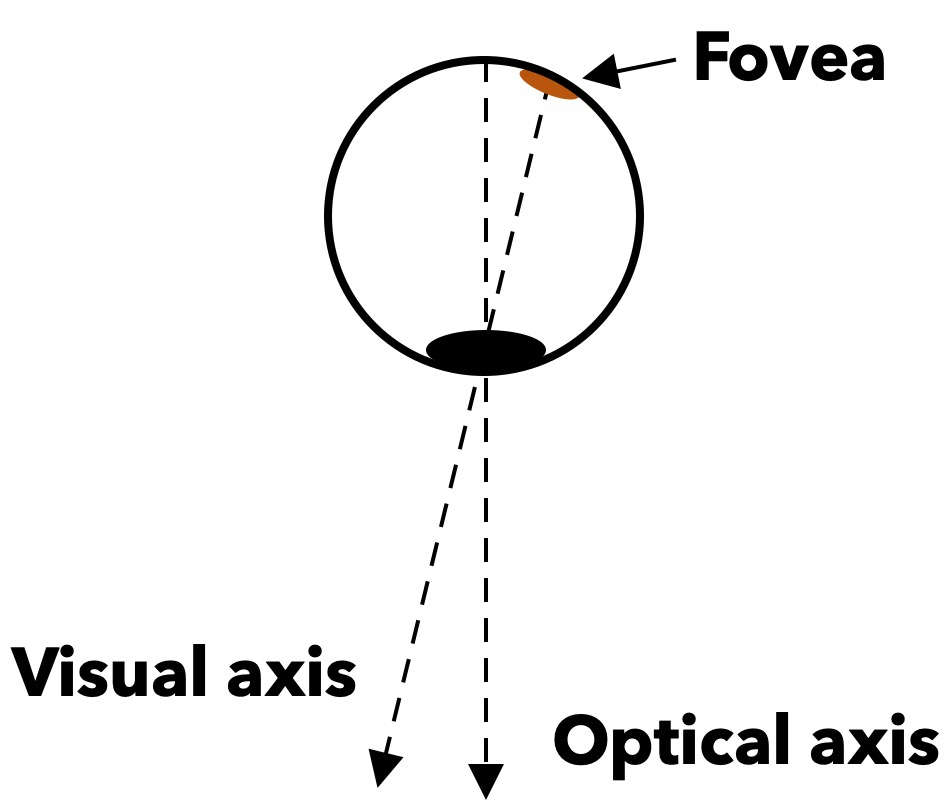

<figcaption class="figure-caption has-text-left">Figure 1: The distinction between the visual and optical axes. The optical axis is defined as an axis perpendicular to the lens behind the pupil. The visual axis depends on the placement of the _fovea_.
</figcaption>
</figure>
</div>


</div>

<div style="float: right; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" id="model">

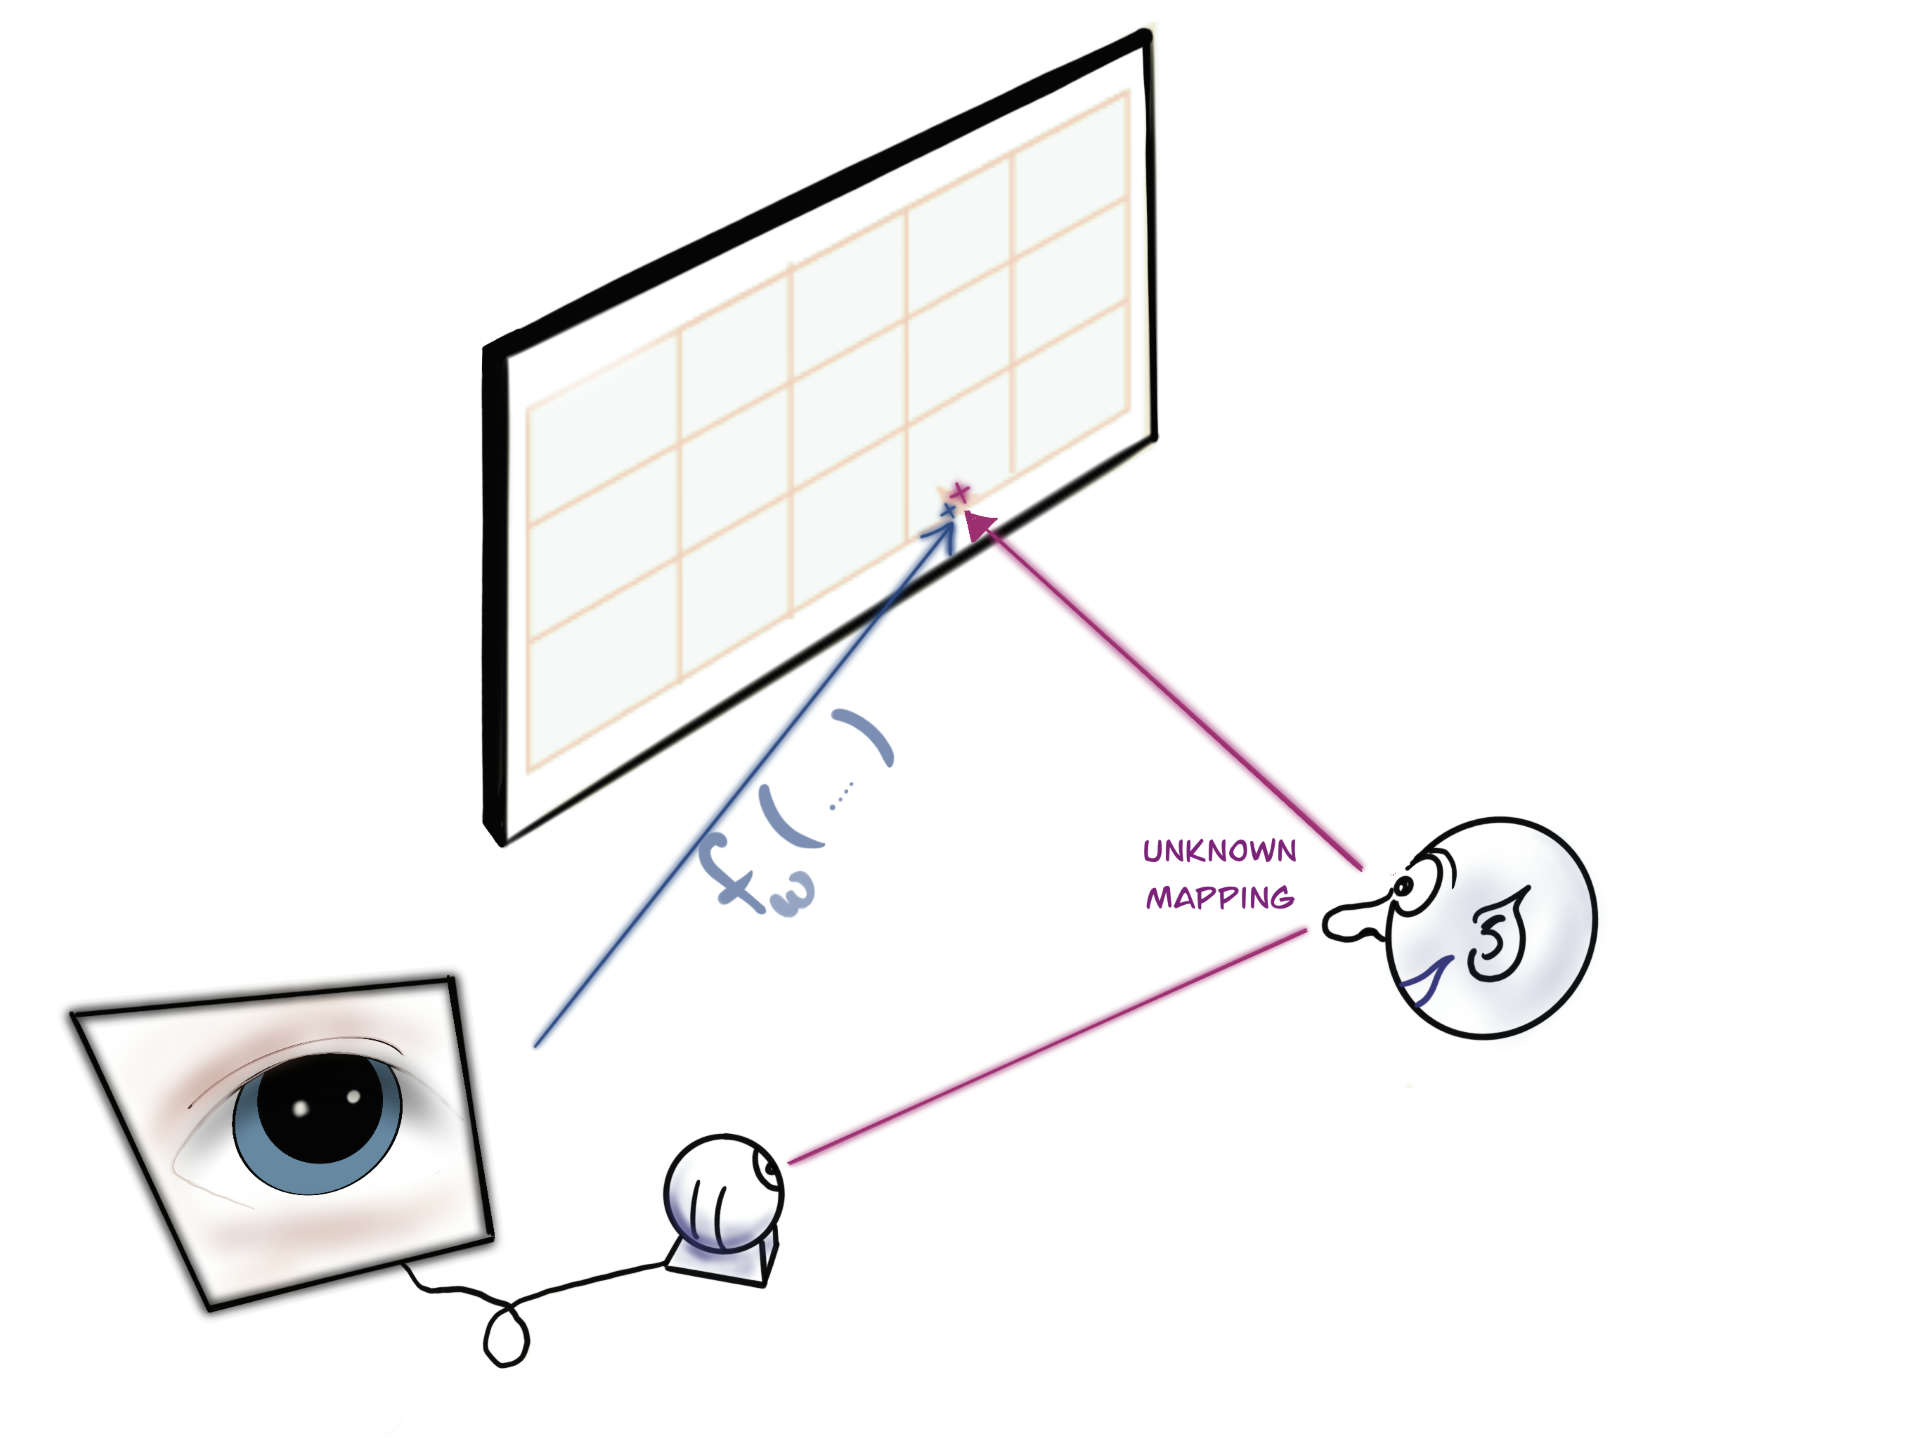

<figcaption class="figure-caption has-text-centered">Figure 2: Diagram of a gaze estimation system. The eye, which is directed at a specific point on
the screen is captured by the camera. The two red lines represent an unknown transformation from image
to eye and eye to screen. We learn this transformation directly which is shown as $f_{\mathbf{w} }(x, y)$ in the diagram.
</figcaption>
</figure>
</div>


</div>



</div>

### Gaze mapping function
The goal of this exercise is to estimate gaze from image sequences using a regression model. Define $f_{\mathbf{w}}(x, y)$ as the gaze  model which maps pupil positions $(x, y)$ to screen coordinates $(x', y')$. The model parameters $\mathbf{w}$ are learned from a training set containing paired pupil and screen positions. 
## Gaze estimation test subject 0
The first step is to train a gaze estimation model using the dataset of `test_person_0`
. You will:
- Train the models using the data `pupils_n_training`
 and `screen_coordinates_training`
. 
- Test the performance of the model using the `pupils_n_testing`
 and `screen_coordinates_testing`
. 

### Data and visualization

---
**Task 1 (easy): Data visualization👩‍💻**
1. Run the cell below to visualize the data of `test_subject_0`
.


---

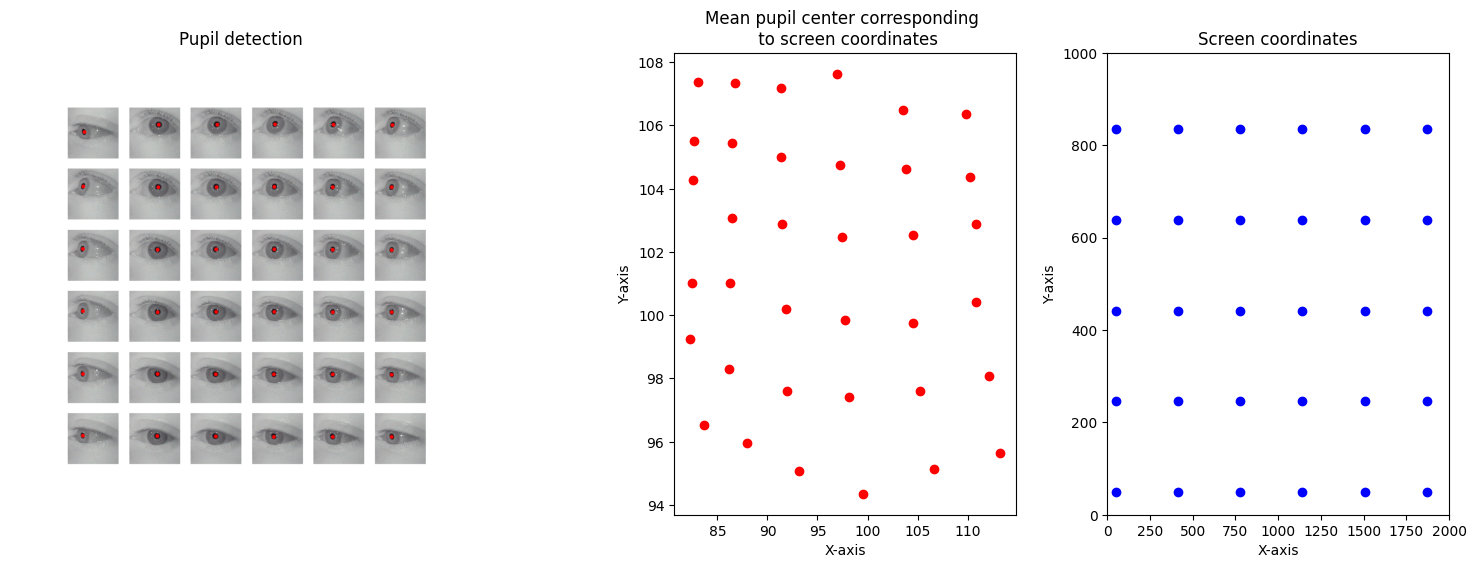

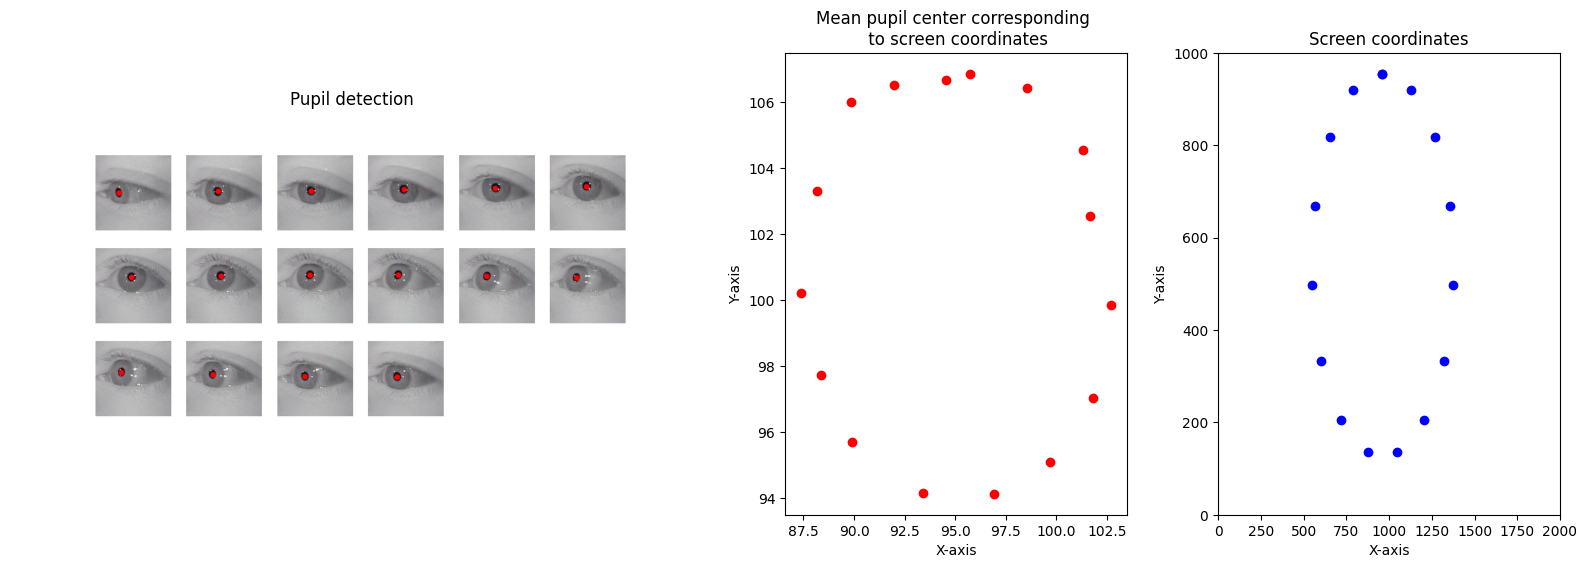

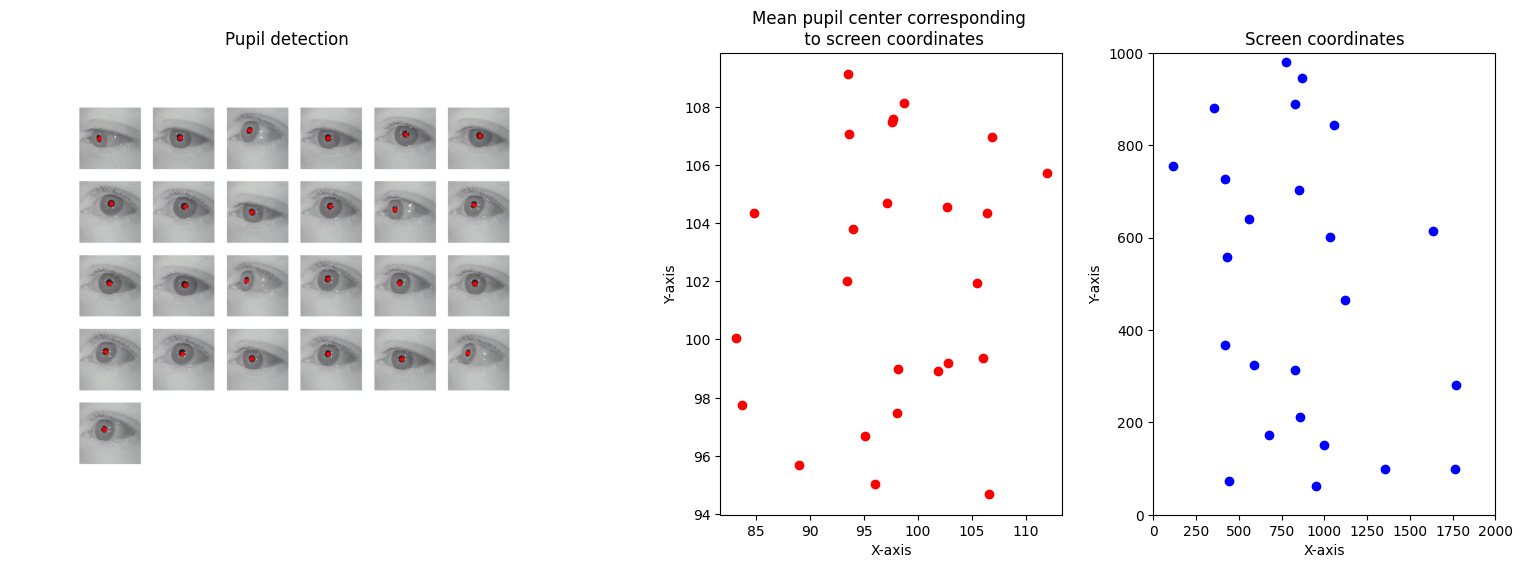

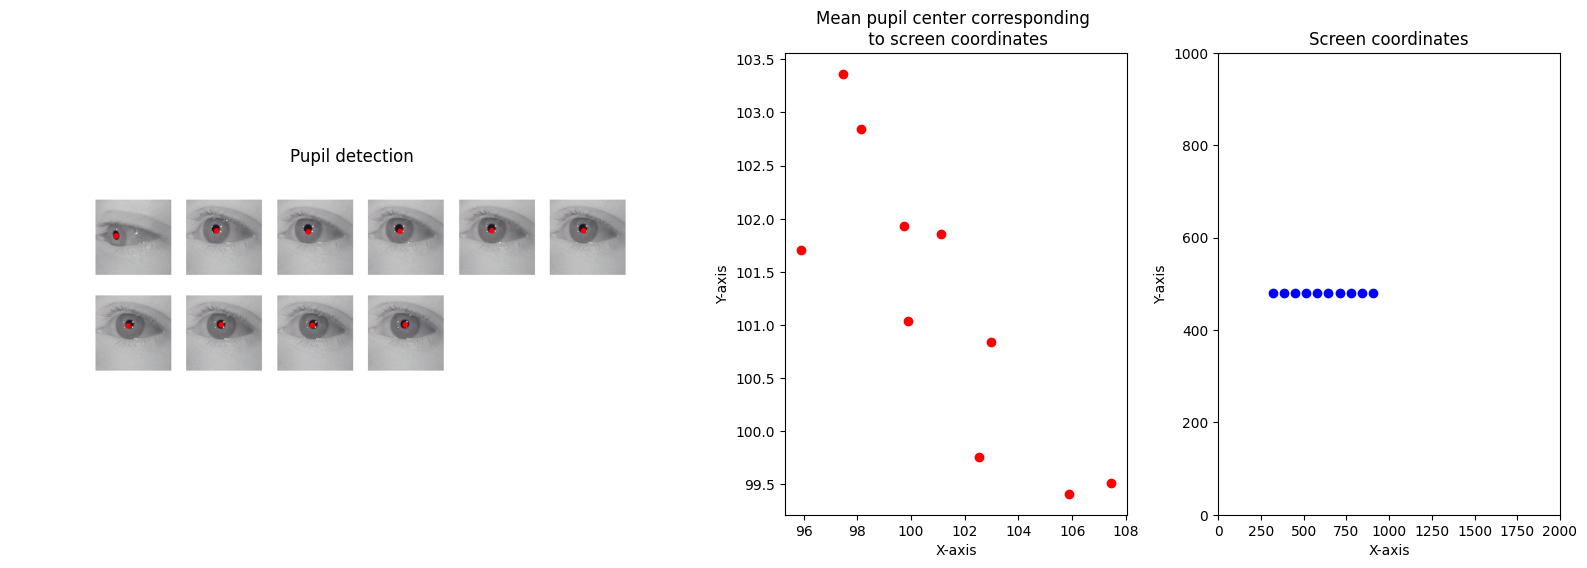

In [104]:
import os
import numpy as np
import matplotlib.pyplot as plt
import iml_util

D = iml_util.gen_data_subject_0()
for i in range(4):
    dataset = D[i]
    grid = iml_util.create_image_grid_viz(dataset)
    iml_util.image_and_scatter(grid, dataset)

## Implement a gaze estimation model
<div style="float: none; width: 100%; justify-content: start" class="block is-clearfix">

<div style="float: right; width: 25%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" id="gaze">

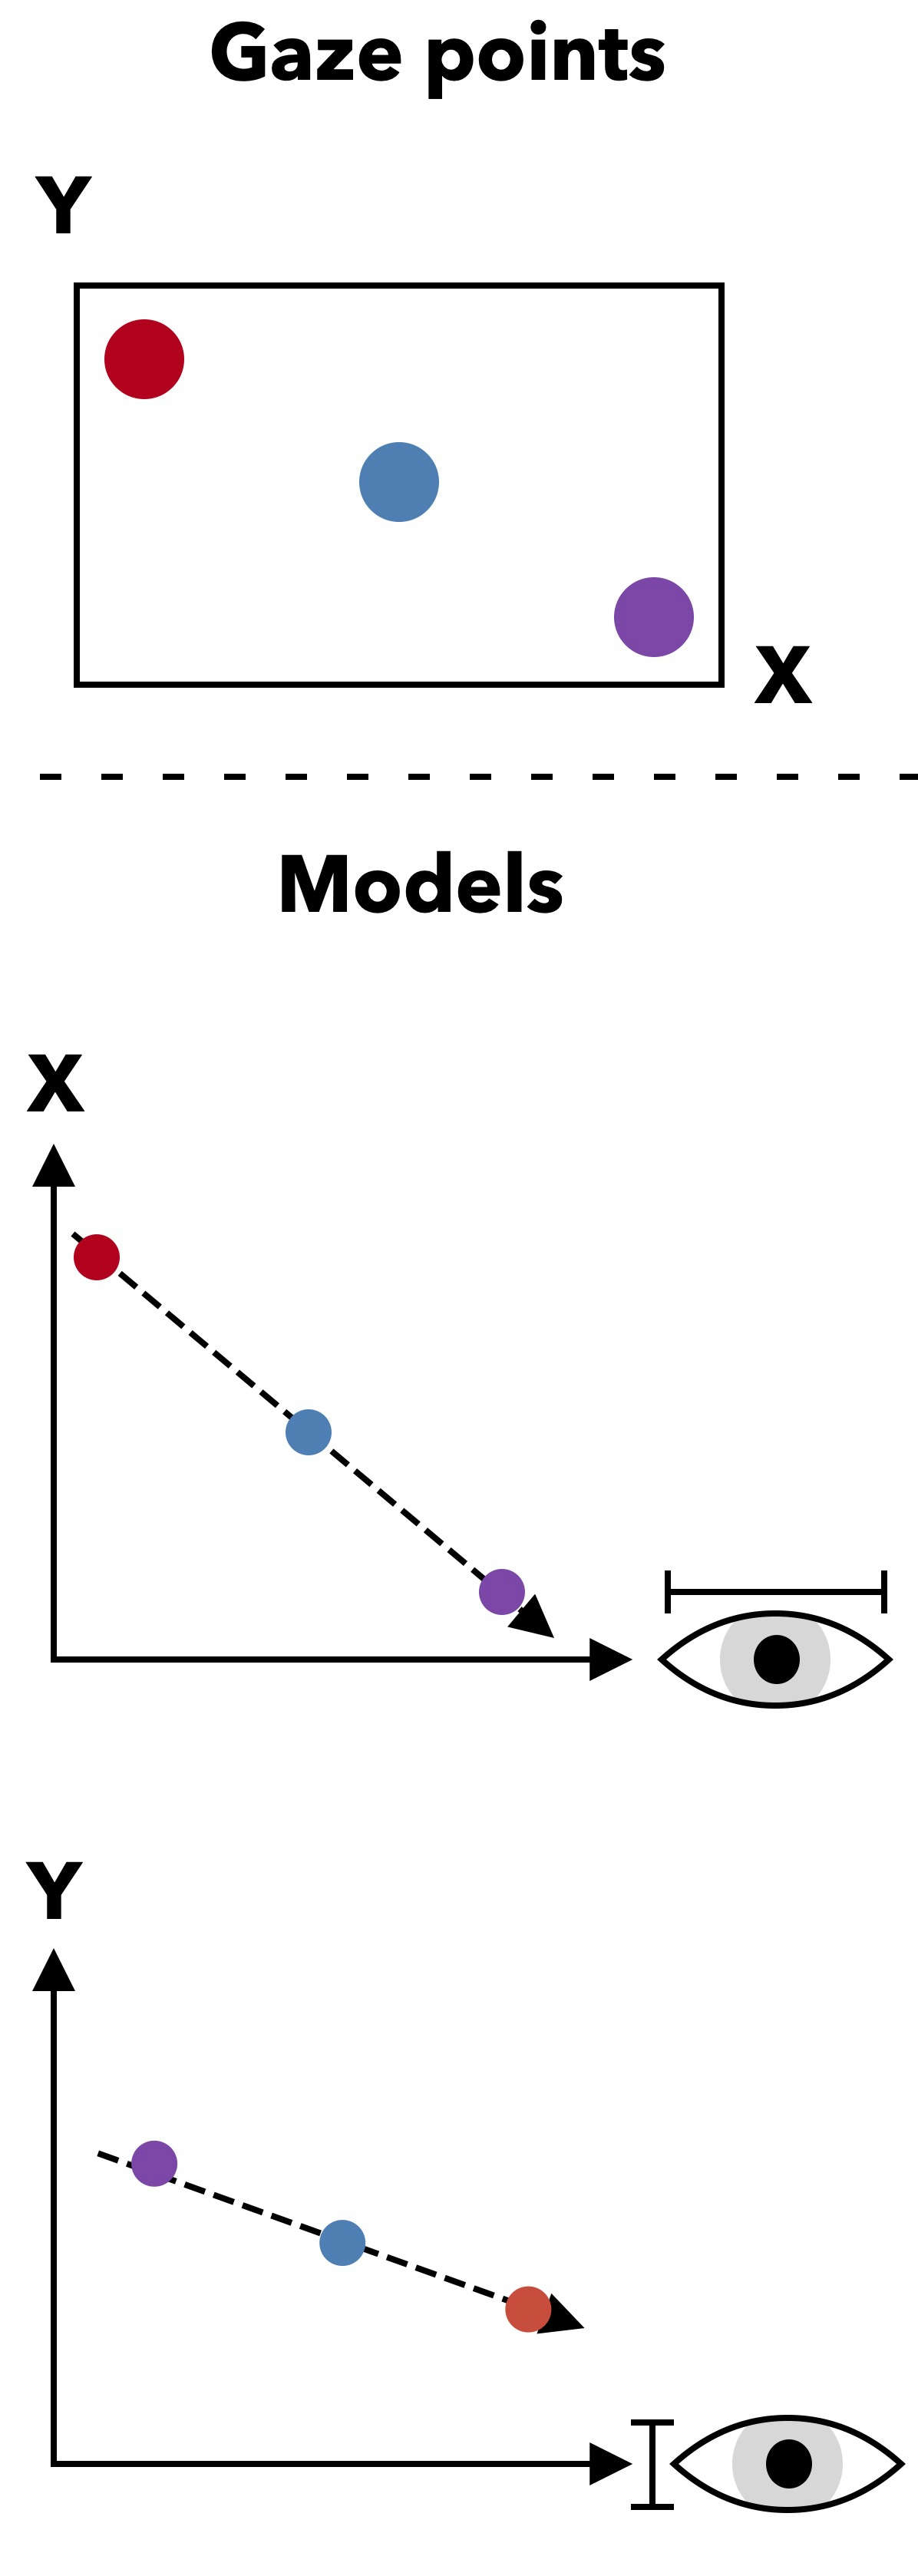

<figcaption class="figure-caption has-text-centered">Figure 3: Point mapping. Top: Three screen coordinates. Middle: Screen and eye $x$ coordinates for the same three points. Bottom: Screen and eye $y$ coordinates for the same three points.
</figcaption>
</figure>
</div>


</div>

<div style="float: left; width: 75%; justify-content: start" class="block is-clearfix">

The true nature of the function that transforms pupil positions to screen positions is not easy to model. Even when the head is stationary, the relationship between pupil position in the image and gaze is non-linear due to the pupil's movement along a spherical curve. For now, we'll approximate the gaze mapping by using a linear function. 
Since the goal is to predict a $2D$ screen coordinate from a $2D$ pupil coordinate, it's more straightforward to train two separate models for each coordinate by following the pattern of previous exercises. The linear gaze model can be expressed as:struct

$$
\begin{aligned}
x' &= ax + by + c\\
y' &= dx + ey + f.
\end{aligned}
$$
Gaze mappings is demonstrated in [Figure 3](#gaze) to the right. Here, the $x$ coordinate of the pupil maps to the $x$ coordinate on the screen. In the real model, we use both $x$ and $y$ as inputs to both models estimating the $x$ position and $y$ position on the screen.

**Hint**
Use the previous exercise
 as a guideline.

In the upcoming tasks, you will be guided through the process of identifying essential entities necessary for establishing the linear equations required to learn the model parameters of the given model. The gaze model is divided into two distinct regression models, denoted as $x' = f_{w_1}(x, y)$ and $y' = f_{w_2}(x, y)$, each associated with its unique set of model parameters $w_1$ and $w_2$. Essentially, one model predicts the value of $x'$, and the other model predicts the value of $y'$. Follow the steps outlined below for the model $x' = f_{w_1}(x, y) = ax + by + c$, and subsequently, replicate the same steps for $y'$.
1. Identify model parameters and inputs to the model. We recommended that you use Least Squares from the numpy library [linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)
, it is recommended due to numerical stability. 
2. Isolate the unknown model parameters and the known into the design matrix.
3. Setup the linear equations $Aw=b$, where $A$ is the design matrix, $w$ the unknown model parameters and $b$ contains labels.



</div>



</div>


---
**Task 2 (medium): Initial reflection💡**
1. Identify the model parameters, inputs and outputs for the model.
2. Identify and determine the minimim number of data points needed to fit the model.
3. Using the least amount of points required to fit the model, does it matter which points are used? Why? Why not? 


---

In [105]:
# 1. 
# x,y will be the inputs of the model, i.e. the mean pupil coordinates (x,y) for each point shown on the screen
# a,b,c and d,e,f will be the parameters of the model, learnt through least squares
# x' and y' are the model outputs, i.e. screen coordinates corresponding to each pair of mean pupil coordinates

# 2.
# As we have 6 parameters to learn in total, we will need at least six independent equations to solve the system.
# Each point provides two equations, one for x' and one for y'. So, we need a minimum of 3 datapoints.

# 3.
# Yes, it matters greatly. 3 datapoint is a very low number, so which points we choose will have a great impact on
# the final output of the model. If, for example, 2 points reflect the mean pupil coordinates well, but 1 doesn't,
# that makes 33% of our dataset faulty, and our model won't perform well. 

# In practice, we will want to use more points to achieve greater robustness and make the model generalize
# better. With only three points, the model won't account for measurement noise or natural variance of measurements,
# and so the predictions will be unreliable. 



---
**Task 3 (medium): Implement a gaze model👩‍💻**
**Note:** You can choose to train two separate models, to predict each screen coordinate separately, or you can train one model predicting both coordinates simultaniously. It may be slightly simpler to use two separate models.

1. **Design matrix:** Implement a function `get_design_matrix`
 to create the design matrix from an array pupil positions.

2. **Calibration:** Complete the implementation of the function `calibrate`
 of the class `LinearGaze`
.
    - Use the `pupils_n_train`
 and `screen_coordinates_train`
 arrays as training data. 
    - Use the function `get_design_matrix`
 to create a design matrix from the pupil positions. 
    - Learn the parameters $\mathbf{w}$ from the dataset using Least Squares. 


3. **Gaze estimation:** Finish the implementation of the function `predict`
 of the class `LinearGaze`
 which predicts the gaze point given a pupil position using the learned model parameters. For reference, the affine model has the form $f_\mathbf{w}(x)=\mathbf{w}_0 x_0 + \mathbf{w}_1 x_1 + \mathbf{w}_2$. You may calculate the point for each coordinate seperately. Return the estimated screen coordinates using the models created during calibration.


**Note:** **Important!** Don't expect the affine model to perform particularly well. Expect the distances between true and predicted gaze points to vary by $\pm 200$ pixels.


---

In [106]:
def get_design_matrix(pupil_positions):
    """
    Constructs a design matrix.
    Parameters:
    pupil_positions (N x 2 numpy array): n samples, 2 features (px, py).
    
    Returns:
    design_matrix (N x 3 numpy array) : n_samples, 2 features + 1
    """
    n, _ = np.shape(pupil_positions)
    intercepts = np.ones(n)
    design = np.column_stack((pupil_positions, intercepts))
    return design

def linear(param, x):
    return param[0] + param[1]*x[0] + param[2]*x[1]

class GazeModel:
    def calibrate(self, dataset):
        ...

    def predict(self, pupil):
        ...

    def predict_many(self, pupils):
        return np.array([self.predict(pupil) for pupil in pupils])


class LinearGaze(GazeModel):
    def calibrate(self, dataset, pupil_training_set, screen_training_set):
        """
        Calibrates the LinearGaze model by fitting two linear regression models for x and y coordinates based 
        on the training dataset.

        Parameters:
            dataset (dict): The dictionary D containing the training data with two keys:
                - "pupils_train" (N x 2 numpy array): n samples, 2 features (px, py) representing pupil 
                  positions.
                - "positions_train" (N x 2 numpy array): n samples, 2 features (screen coordinate x, screen coordinates y) representing
                  the true gaze positions being the screen coordinates.

        Returns:
            None: Updates the model's parameters (self.model_x, self.model_y) based on 
            the least squares solution for x and y positions.
        """

        design = get_design_matrix(dataset.get(pupil_training_set))
        b_x  = dataset.get(screen_training_set)[:, 0]
        b_y = dataset.get(screen_training_set)[:, 1]
        self.model_x = np.linalg.lstsq(design, b_x)[0]
        self.model_y = np.linalg.lstsq(design, b_y)[0]

        # in task 4, I have to return it after all, their fault
        return (self.model_x, self.model_y)



    def predict(self, pupil):
        """
        Predicts the gaze position (x, y) based on the given pupil position using the calibrated model.

        Parameters:
            pupil (1 x 2 numpy array): 2 features (px, py) representing the current pupil position.

        Returns:
            x, y (float, float): Predicted gaze position (x, y) based on the linear model.
        """
        x = pupil[0] * self.model_x[0] + pupil[1] * self.model_x[1] + self.model_x[2]
        y = pupil[0] * self.model_y[0] + pupil[1] * self.model_y[1] + self.model_y[2]
        return(x,y)

# I assumed the column of ones should be the last one
print("Design Matrix:")
print(get_design_matrix(np.array([[1,2],[2,3],[4,5]])))

linGaze = LinearGaze()
print("\nModel weights (first for x, then for y):")
print(linGaze.calibrate(dataset = {"pupils_n_train":np.array([[1,2],[2,3],[3,4]]), "screen_coordinates_train":np.array([[2,3],[4,5],[6,7]])}, pupil_training_set="pupils_n_train", screen_training_set="screen_coordinates_train"))

print("\nSample prediction:")
print(linGaze.predict([5,10]))

Design Matrix:
[[1. 2. 1.]
 [2. 3. 1.]
 [4. 5. 1.]]

Model weights (first for x, then for y):
(array([ 1.33333333,  0.66666667, -0.66666667]), array([ 1.00000000e+00,  1.00000000e+00, -1.51217223e-16]))

Sample prediction:
(np.float64(12.666666666666666), np.float64(15.000000000000002))



---
**Task 4 (medium): Model evaluation👩‍💻💡**
The following task is about evaluating the performance of your models. In the following task you will complete the function `results_for_model`
. It is important that the results are calculated for the complete dataset of `test_subject_0`
 (all of $\mathcal{D}_{p0}, \mathcal{D}_{p1}, \mathcal{D}_{p2}, \mathcal{D}_{p3}$ as one dataset).
1. Finish the implementation of the function `results_for_model`
. For each dataset it must:    - **Calculate prediction errors:**         - Calculate:            - The _absolute error_ between each prediction and true gaze.
            - The _mean Eucledian distance_ between the true values and the predictions.
            - The _root-mean-square error_ (_rmse_) between the true values and the predictions.
            - The _mean absolute error_ (_mae_) as well.








---

In [107]:
def results_for_model(model, dataset_train, dataset_test, pupil_training_set, screen_training_set, pupil_test_set, screen_test_set, d_max):
    """
    Evaluates the performance of the model across multiple datasets and computes prediction errors.

    Parameters:
        model (object): A gaze model object.
        d_max (int, optional): Maximum number of patterns of a dataset to evaluate. Default is 4.

    Returns:
        results (dict): A dictionary where each key corresponds to a dataset index (0 to d_max-1), and each value is a dictionary containing:
            - "predicted" (1 x N numpy array): The predicted values
            - "ground_truth" (1 x N numpy array): The corresponding ground truth values to the predicted
            - "model_x" (list): List of model paramters for model x 
            - "model_y" (list): List of model paramters for model y 
            - "errors" (N x 2 numpy array): Absolute errors between predicted and ground truth positions (x, y).
            - "rmse" (float): Root Mean Squared Error (RMSE) for the predictions across the dataset.
            - "dist" (float): Mean Euclidean distance between the predicted and actual positions.
            - "mae" (1 x 2 numpy array): Mean absolute error in x and y dimensions.
    """

    results = {}
    for d in range(d_max):
        train = dataset_train[d]
        test = dataset_test[d]
        model_x, model_y = model.calibrate(train, pupil_training_set, screen_training_set)
        predicted = model.predict_many(test[pupil_test_set])
        ground_truth = test[screen_test_set]
        errors = np.abs(predicted - ground_truth)
        rmse = np.sqrt(np.mean(np.sum((predicted - ground_truth)**2, axis=1)))
        dist = np.mean(np.sqrt(np.sum((predicted - ground_truth)**2, axis=1)))
        mae = np.mean(np.abs(predicted - ground_truth), axis=0)
        results.update({d:{
            "predicted": predicted,
            "ground_truth": ground_truth,
            "model_x": model_x,
            "model_y": model_y,
            "errors": errors,
            "rmse" : rmse,
            "dist": dist,
            "mae": mae
            }})
       
    return results
 
results_linear = results_for_model(LinearGaze(), D, D,  'pupils_n_train', 'screen_coordinates_train', 'pupils_n_test', 'screen_coordinates_test', 4)

#sanity check
print(results_linear.keys())
print(results_linear.get(0).keys())
print(results_linear.get(2).get("rmse"))


dict_keys([0, 1, 2, 3])
dict_keys(['predicted', 'ground_truth', 'model_x', 'model_y', 'errors', 'rmse', 'dist', 'mae'])
103.11944822567628


Below you find a cell containing a function for visualizing the performance of the model. 

---
**Task 5 (medium): Visualize performance of your model👩‍💻**
1. **Create visualizations:** Run the cell below to visualiz the performance of the model for all patterns using the function `plot_results_grid`
 from `iml_util.py`
. The function takes a dictionary of results as well as the number of patterns in the dictionary. Combined they provide an overview of the nature of the error across the two dimensions.


---

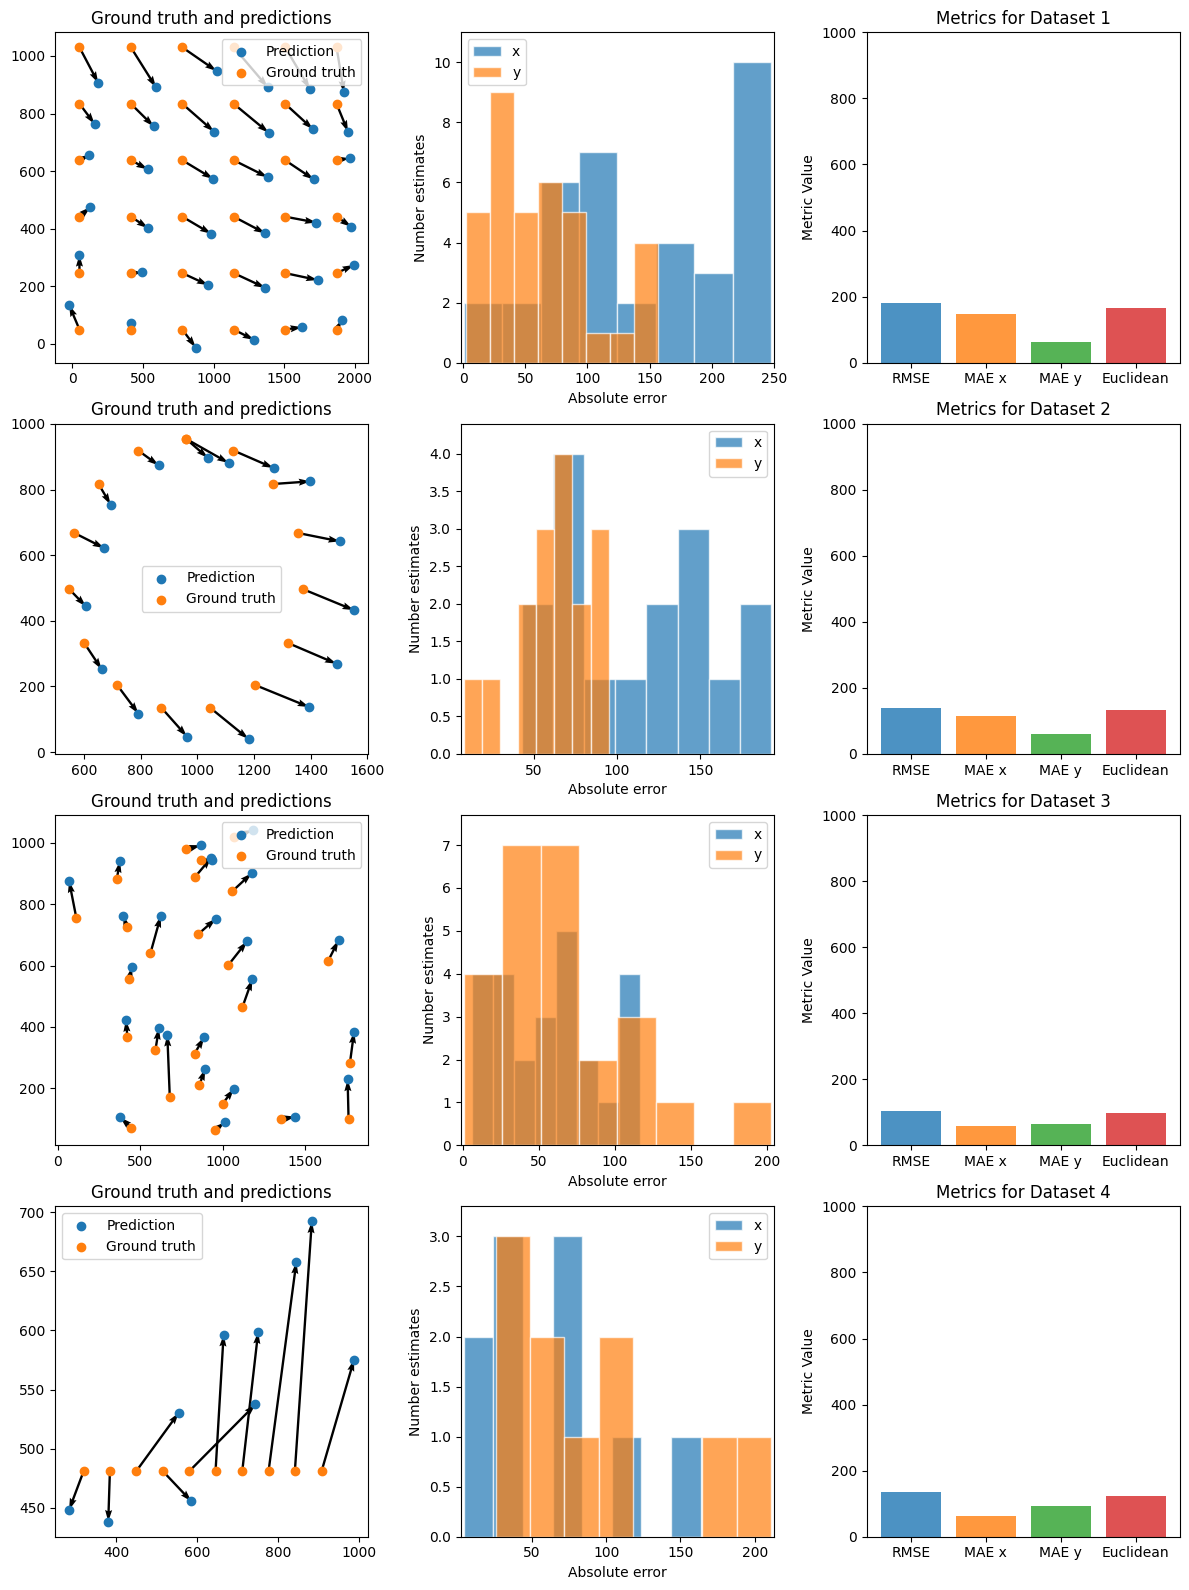

In [108]:
iml_util.plot_results_grid(results_linear, 4)


---
**Task 6 (medium): Evaluate performance of your model💡**
1. Evaluate the usefulness of the _mae_ or _rmse_ and their differences.
2. Identify at least 3 potential sources of error associated with the current affine model. Describe how each source of error contributes to the prediction error.


---

In [109]:
#Write your reflection here...
# It is not super bad :D yay!
for i in range(4):
    print(f"Dataset {i}:")
    print(f"RMSE:\t{results_linear[i]['rmse']}")
    print(f"MAE:\t{results_linear[i]['mae']}")
# 1 - from prints we get insights into how well the model is doing on each dataset - RMSE is super useful here because
# it tells us a single number of how far we are from the truth and it also punishes really wrong answers super badly (
# i.e. if a few datapoints are super wrong, it will impact this measure more than a group of datapoints we are almost right
# about). At the same time, the MAE more directly relates to what we can see and understand from the plots, and supports
# the natural error evaluation we may do. It is also less volatile to outliers that may occur from noise or other factors.

# 2 - There are many sources of error in the affine model:
## 2.1 - Noisy data - natural variations and errors occurring from the real-life volatile setup
## 2.2 - Model Complexity - if the model is not complex enough or too complex for the complexity of the problem, it may under-
## or overfit to the training data and thus not generalise to the test data.
## 2.3 - Differences in setup for training and test sets (unsure, since we do not know how the data was collected or split)

Dataset 0:
RMSE:	179.3963611371807
MAE:	[146.19233435  63.12611259]
Dataset 1:
RMSE:	139.93611233093924
MAE:	[115.10233956  60.91474478]
Dataset 2:
RMSE:	103.11944822567628
MAE:	[57.62055169 64.51281295]
Dataset 3:
RMSE:	134.12694443377205
MAE:	[62.92669281 92.16703207]


You have now went through the first part of the assignment processing the session of `test_subject_0`
. The remaining part of the assignment use the same approach as you have just gone through with the purpose of you working with and reflecting on the use of your own data collected. 
## Test on test subject 1
In the data processing exercise Data preprocessing
 the pupil corrdinates `mean_pupil_coordinates.csv`
 and the corresponding screen coordinates `screen_coordinates.csv`
 were saved in the in the folder with the test subjects and patterns. Recall the four calibration patterns used for the data collection being **grid**, **circle**, **line** and **random**.
In this exercise you will use the calibration (training data) of `test_subject_0`
 on the data from `test_subject_1`
 and visualized in [Figure 4](#calibration).
<div style="float: none; width: 100%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" id="calibration">

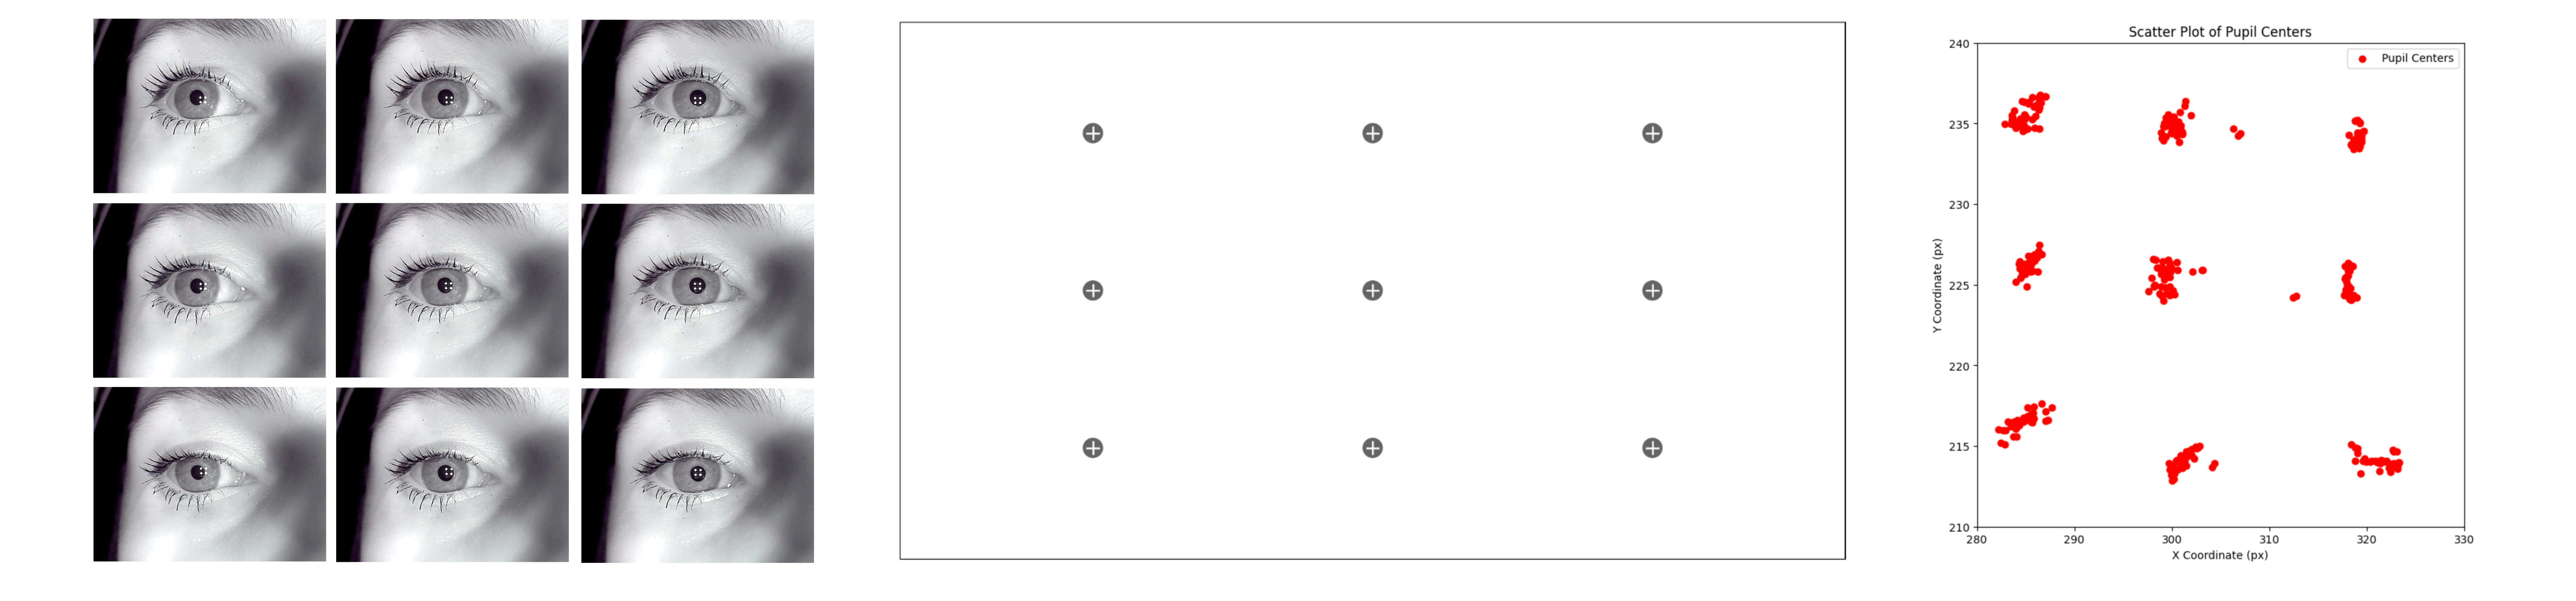

<figcaption class="figure-caption has-text-centered">Figure 4: Left: Images from calibration pattern grid. Middle: Calibration pattern. Right: Pupil center scatterplot from calibration pattern grid.</figcaption>
</figure>
</div>


</div>


---
**Task 7 (easy): Load the data👩‍💻**
1. Run the cell below to load the data of `test_subject_1`
. _Similarily_ to the data of `test_subject_0`
 meaning that the `grid`
 pattern is defined as training set for all other patterns. The data is stored as a list of dictionaries in the following order: `grid`
, `circle`
, `line`
, and `random`
. Within each dictionary you find: 


**Details about the data format of `test_subject_1`**
**Dataset elements:**
- `pupils_train`
: Mean pupil positions for the 9 calibration points from `grid`
 pattern (an $9 \times 2$ array containing the x and y coordinates (`px`
, `py`
)).
- `screen_coordinates_train`
: Screen target positions for the 9 calibration points from `grid`
pattern ($9 \times 2$ array containing x,y pixel position for the target on the screen (`sx`
, `sy`
)).
- `pupils_test`
: Mean pupil positions for the calibration points for the pattern accociated as the key(an $N \times 2$ array containing the $N$ x and y coordinates (`px`
, `py`
)).
- `screen_coordinates_train`
: Screen target positions for the N calibration points associated to the pattern defined as the key ($N \times 2$ array containing the $N$ x andy pixel positions for the target on the screen (`sx`
, `sy`
))



---

In [110]:
test_subject = 'test_subject_1'
trial = '20250820_T0'
D3 = iml_util.gen_data_subject(test_subject, trial)

# We found an error in the code and fixed it with below
# In iml_util, please replace function such that:
#def gen_data_subject(test_subject, trial):
#    """
#    Generates and returns a list of datasets for a given test subject, containing pupil and screen coordinate data
#    for different patterns ('grid', 'circle', 'line', 'random'). Each dataset includes training and testing data 
#    for pupils and screen coordinates.

#    Parameters:
#        test_subject (str): The subject identifier (e.g., 'test_subject_1') from which data will be loaded.

#    Returns:
#        D (list): A list of dictionaries, each containing the following keys:
#                  - 'pupils_train': N x 2 array of pupil training coordinates.
#                  - 'pupils_test': N x 2 array of pupil testing coordinates.
#                  - 'screen_coordinates_train': N x 2 array of screen coordinate training data.
#                  - 'screen_coordinates_test': N x 2 array of screen coordinate testing data.
#    """
#    D = []
#    p = ['grid', 'circle', 'line', 'random']
#    for f in p:
#        D.append({
#            f"pupils_train": create_pupil_data(load_csv(test_subject, trial, 'grid', 'mean_pupil_coordinates')),
#            f"pupils_test": create_pupil_data(load_csv(test_subject, trial, f, 'mean_pupil_coordinates')),
#            f"screen_coordinates_train": create_position_data_collection(load_csv(test_subject,trial, 'grid', 'screen_coordinates')),
#            f"screen_coordinates_test": create_position_data_collection(load_csv(test_subject, trial, f, 'screen_coordinates')),
#        })
#    return D


---
**Task 8 (easy): Visualize performance👩‍💻**
1. Run the cell below to evaluate the gaze estimation model using the data from `test_subject_1`



---

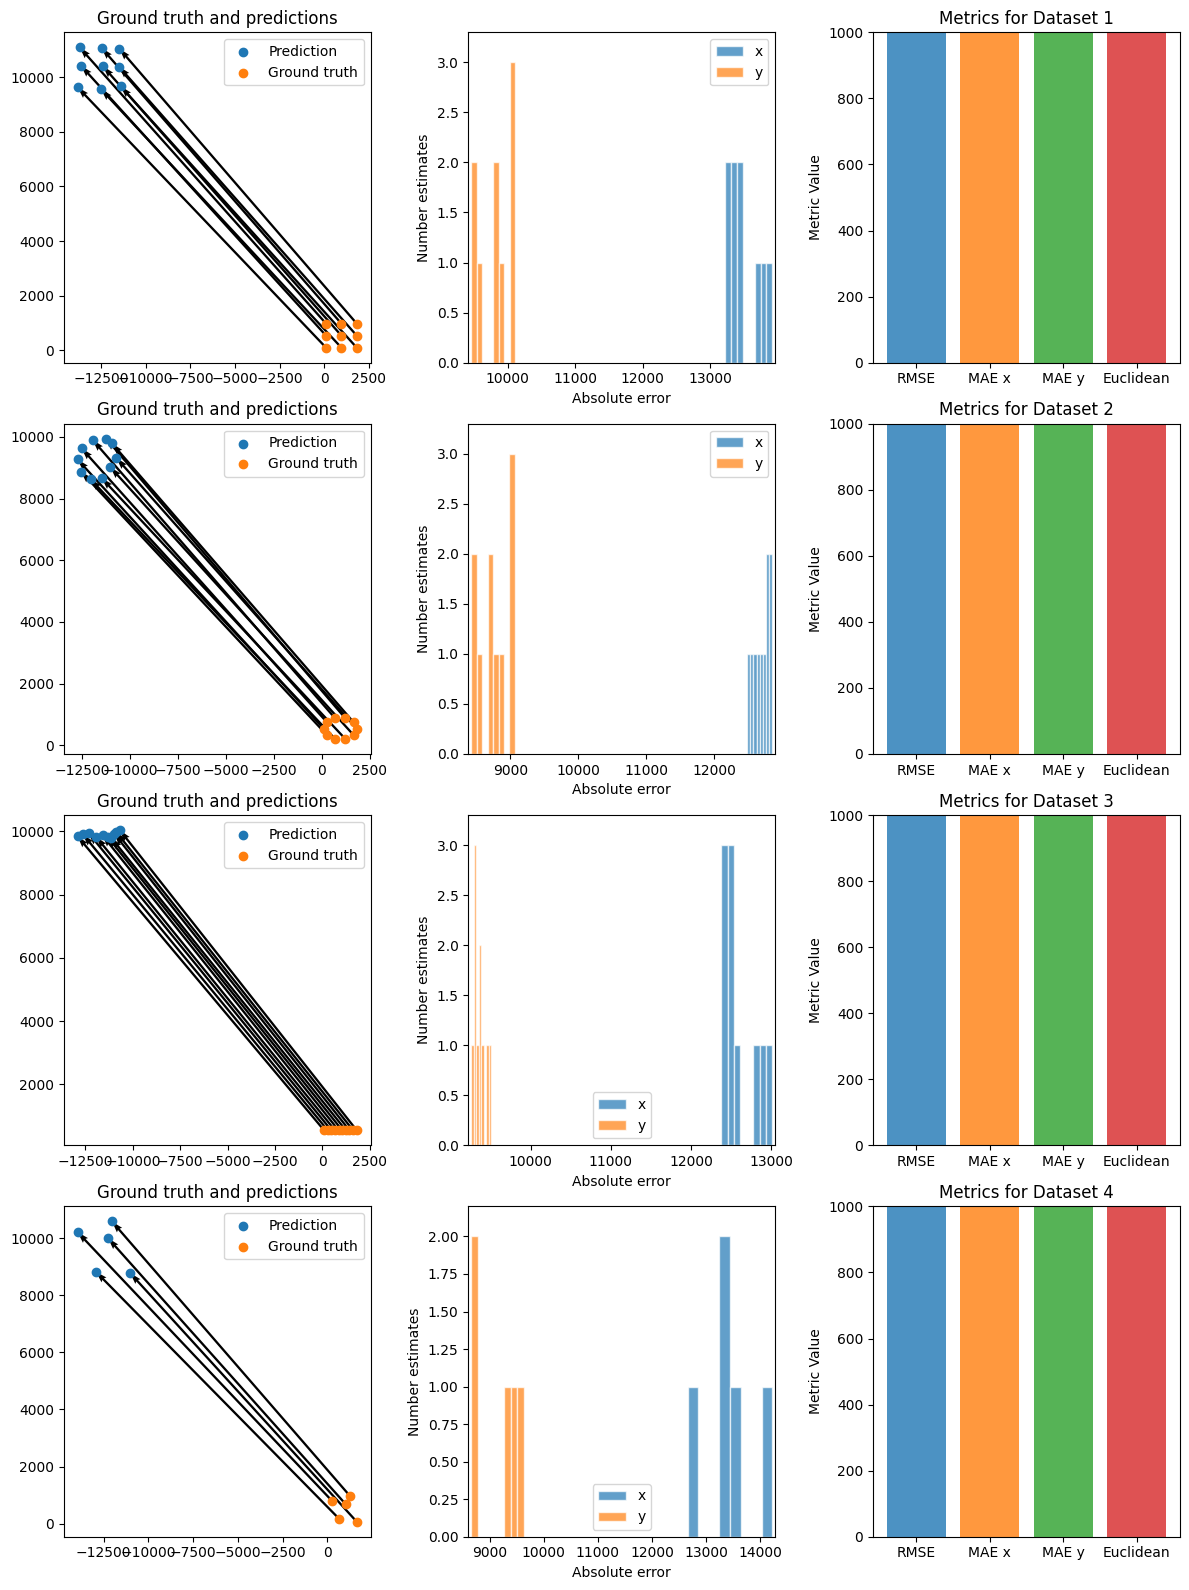

In [111]:
results_linear_ts3 = results_for_model(LinearGaze(), D, D3, 'pupils_n_train', 'screen_coordinates_train', 'pupils_test', 'screen_coordinates_test', 4)

iml_util.plot_results_grid(results_linear_ts3, 4)


---
**Task 9 (medium): Evaluation♾️💡**
You likely have observed larger prediction errors, including the `MAE_y`
 and `RMSE`
. Reflect on:
1. How well does the model generalize?
2. Use your reflections in Task 8 in the exercise Data preprocessing
 to elaborate on the results in this exercise.
3. Comment on differences between the predicted `x`
 and `y`
 coordinate.


---

In [112]:
#Write your reflections here...
# 1 - It generalizes really badly - but as introduced in this assignment, each individual has different degrees for their
# gaze, whihc means that training on data from one person is not gonna work for another person.

# 2 - i am unsure which reflections you are referring to, as task 8 was simply preprocessing of test_subject_1.
# BUT - both in terms of finding the pupils there are hyper-parameters connected to the individual dataset which are highly 
# individual - besides the different angles of gaze, the intial x-y coordinate locations may also skew the data.

# 3 - seems the predictions are consistently skewed - they generally follow the correct pattern but are just referring to
# the wrong section of the screen.

## Gaze estimation test subject 1
In this the gaze estimation model is trained using the `grid`
 pattern of `test_subject_1`
, and test it on the patterns. 

---
**Task 10 (easy): Train and test a model👩‍💻**
1. Use `result_for_model`
 to train and test a gaze estimation model based on `test_subject_1`
.
2. Use `plot_results_grid`
 to visualize the result.

**Note:** The result using pupil centers from the `grid`
 pattern is a result of training and testing on the same data.


---

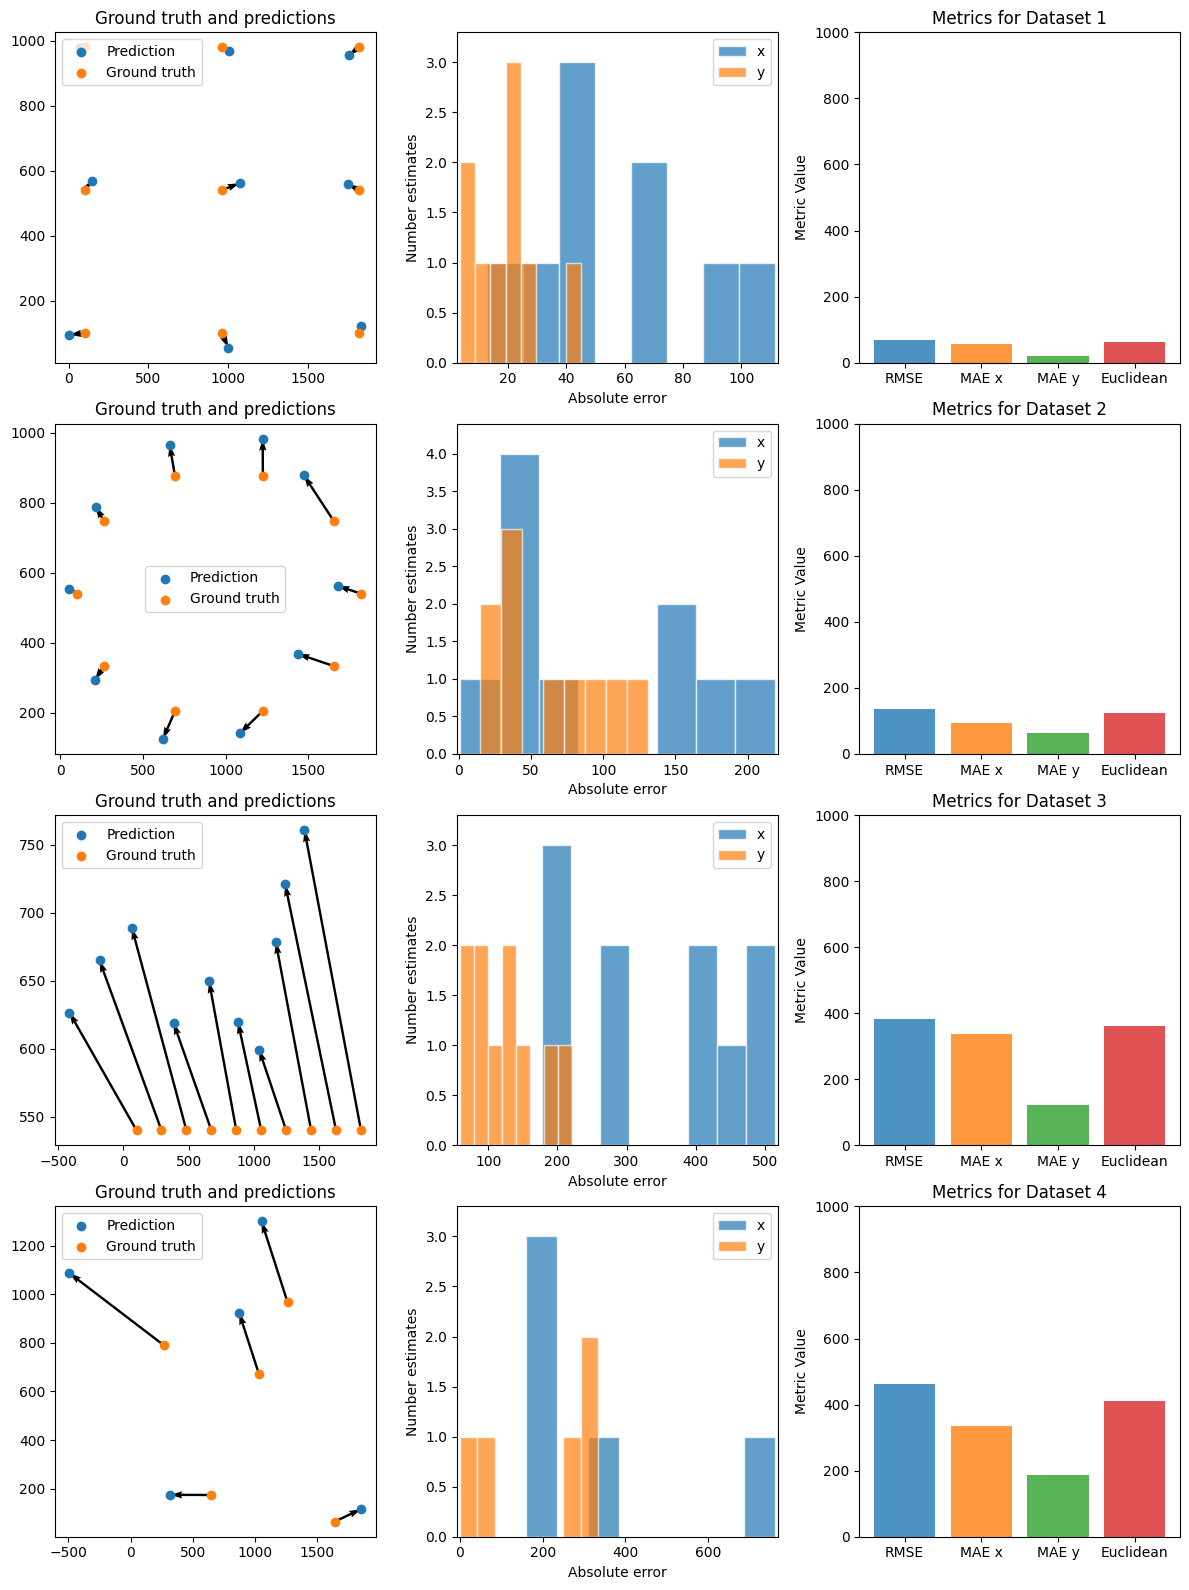

In [113]:
# Write your code here
results_linear_ts4 = results_for_model(LinearGaze(), D3, D3, 'pupils_train', 'screen_coordinates_train', 'pupils_test', 'screen_coordinates_test', 4)

iml_util.plot_results_grid(results_linear_ts4, 4)



---
**Task 11 (easy): Evaluation💡**
1. Reflect on the result testing the model on `test_subject_1`
.     - Use your reflection from Task 8 in exercise Data preprocessing
 to elaborate on the result.        - Why does the performance of the model trained on `test_subject_1`
 show significantly larger prediction errors compared to the one trained **and** tested on `test_subject_0`
?






---

In [114]:
#Write your reflections here...
# First of all, this question makes absolutely no sense - why are we referring to tets_subject_0 here?
# Dont you mean to ask whether the model trained and tested on test_subject_1 outperforms the one trained on test_subject_0?

# Whichever case, the model which is trained and tested on the same subject is significantly better than the one trained
# on 1 individual and tested on another. This is due to teh factors we have talked about many times - noise is different,
# angle of gaze is different, position on camera is different etc.

# If not correcting iml_util.py, these predictions will be almost on-point for all data_points, if correcting they will be
# decent and much better than in task 8 still :D

Until now the models have been trained using the nine calibration points from the `grid`
 pattern. You will now increase the amount of training data by incoorporating all patterns except `circle`
. The pattern `circle`
 will be used for testing. In the cell below a dictionary `D3_mod`
 contains the training and test data similar to the structure of `D`
and `D3`
. . 

---
**Task 12 (medium): Adding more data♾️💡**
1. Use the function`results_for_model`
 and the `LinearGaze`
 class to train a new model using `D3_mod`
. Use `plot_results_grid`
 to visualize the results and the function `plot_from_results_dict`
 to visualize the models.
2. Run the cell below to train and test the model and visualize the result. 


---

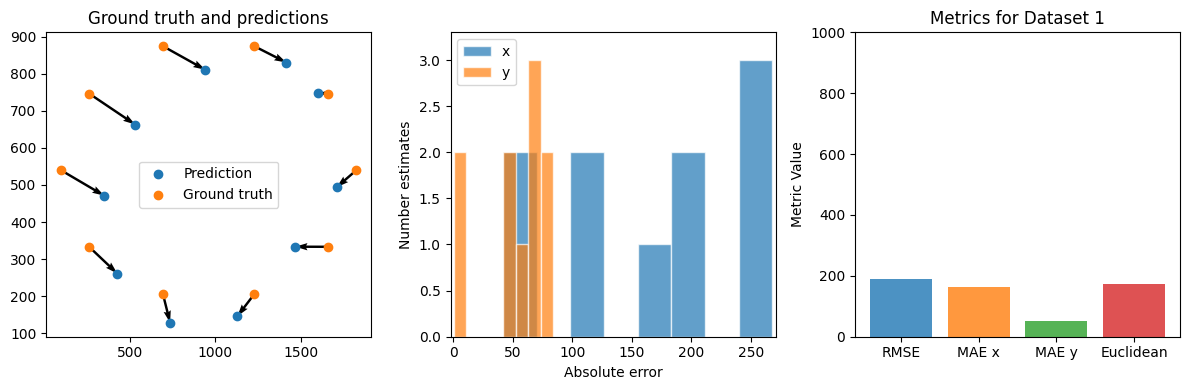

In [115]:
D3_mod = {}

ts3_p_train = D3[0]['pupils_test']
ts3_s_train = D3[0]['screen_coordinates_test'] 

ts3_p_test = D3[1]['pupils_test']
ts3_s_test = D3[1]['screen_coordinates_test']

for i in range(2,4):
    ts3_p_train = np.vstack((ts3_p_train,D3[i]['pupils_test']))
    ts3_s_train = np.vstack((ts3_s_train,D3[i]['screen_coordinates_test']))
    
D3_mod['pupils_train'] = ts3_p_train
D3_mod['screen_coordinates_train'] = ts3_s_train
D3_mod['pupils_test'] = ts3_p_test
D3_mod['screen_coordinates_test'] = ts3_s_test

D3_mod = [D3_mod]

# Write your code here
results_linear_ts5 = results_for_model(LinearGaze(), D3_mod, D3_mod, 'pupils_train', 'screen_coordinates_train', 'pupils_test', 'screen_coordinates_test', 1)

iml_util.plot_results_grid(results_linear_ts5, 1)


---
**Task 13 (medium): Evaluate♾️💡**
1. How does adding more training data affect the results.    - Does increasing the amount of training data _always_ improve the model's accuracy?
    - How does the variability in the data affect the model's ability to generalize when more data is added (elaborate on your reflection from Task 2.3)?
    - How could adding more data influence the optimization of the model parameters?




---

In [116]:
#Write your reflections here...
# IF USING THE ORIGINAL IML_UTIL WITHOUT OUR FIX: it became worse (because before the training_data == testing_data)
# IF USING CORRECTED FUNCTION: It seems better - it makes sense as we have a more accurate picture of where the person is
# looking for a particular x,y coordinate :D - we see the absolute errors were generally low already for the circle.

# The variability in the data should even out when adding more data - in statistics we generally talk about noise as a term
# that if it is non-dependent should sum to 0 over larger amounts of data. Having larger amounts of data therefore means
# that we can learn the pattern under the noise instead of learning the noise pattern!
# More data also ensures outliers / singular data points usually have less of an effect on the overall model fit <3



## Individual dataset
The pipeline of collecting data, training a model, testing, and evaluating it has been introduced. In this task, the data of your eyes will be used to train a model. Use the evaluation tools introduced in the assignment.

---
**Task 14 (easy): Individual dataset**
1. For reproduceability, write the _threshold_, _x_margin_, _y_margin_ and _side_ values that was used in the processing your data in Task 4 of the  Data preprocessing
 exercise.


---

In [117]:
#Note the values here
# threshold_value = 80
# x_top = 175
# y_top = 140
# x_bottom = 275
# y_bottom = 200


---
**Task 15 (medium): Train and test a model**
1. Run the cell below to generate a dictionary of your own data.
2. Train an affine gaze estimation model using the pattern `grid`
.
3. Test the model on  all patterns.


---

In [118]:
# update the parameter and uncomment the line below
test_subject = 'miejo'
trial = '20250922_T0'
D4 = iml_util.gen_data_subject(test_subject, trial)

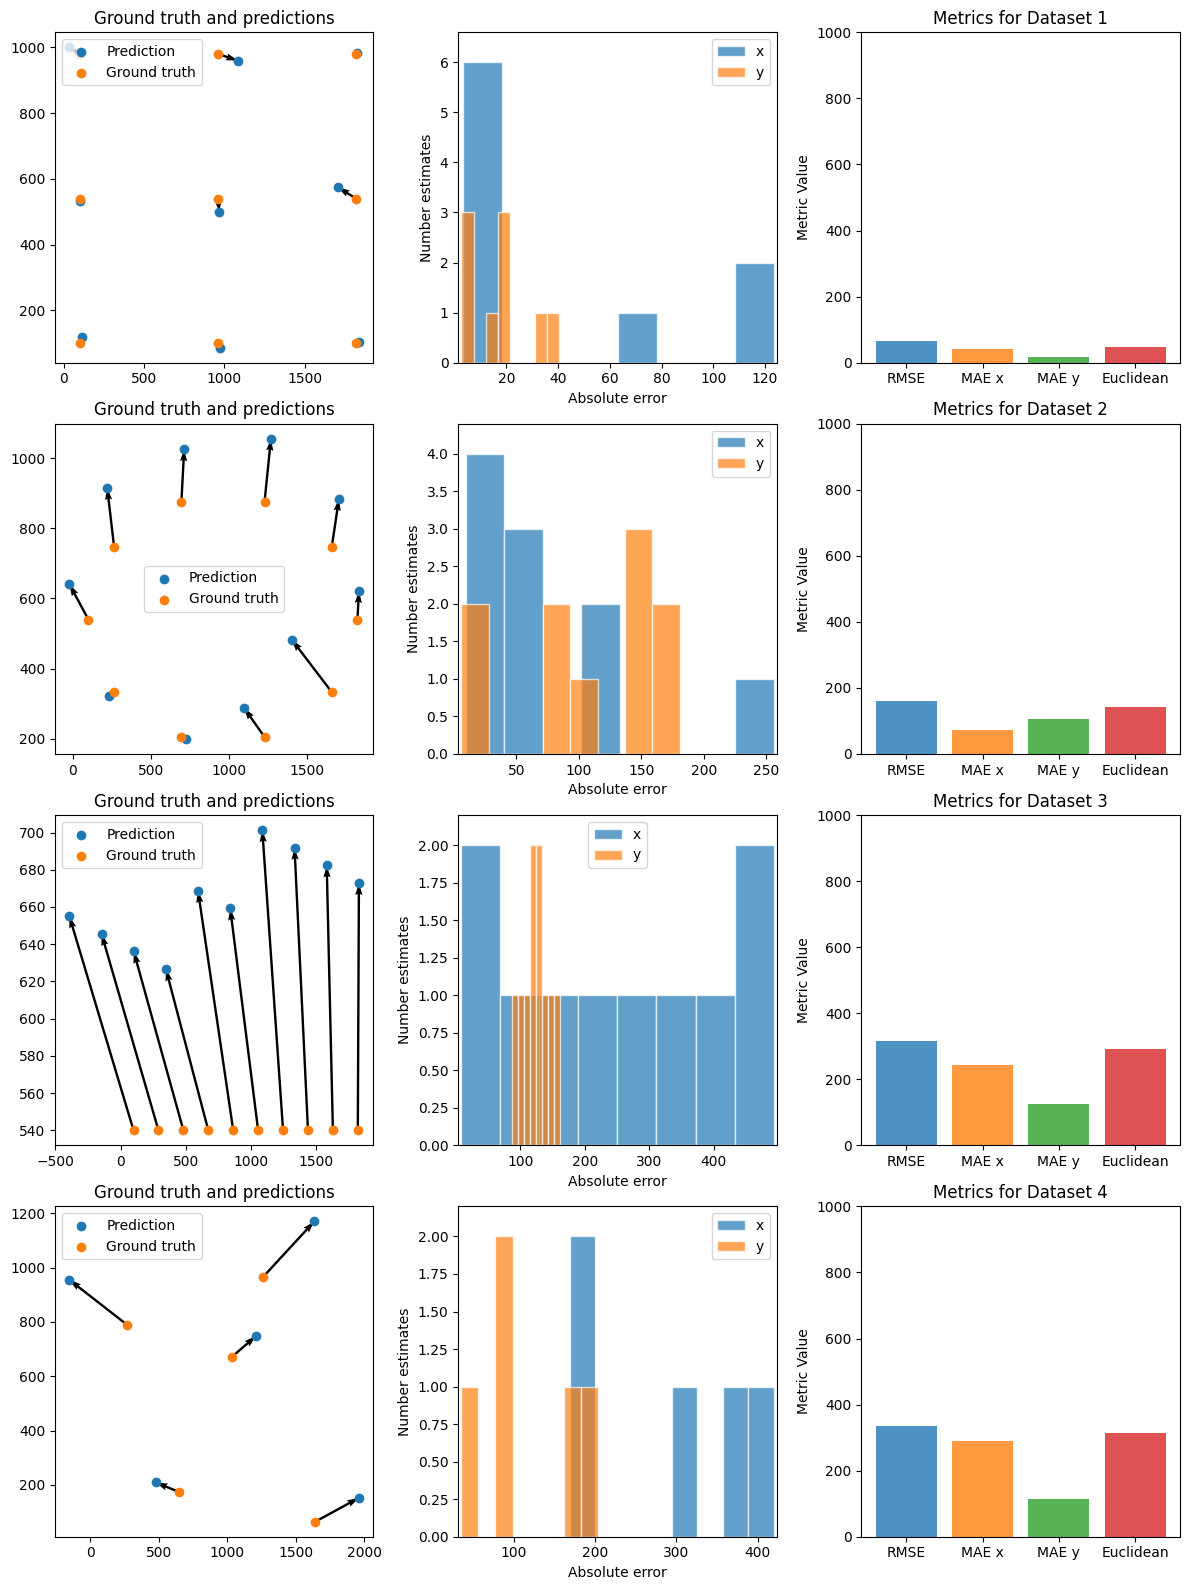

In [119]:
#Use this cell to train and evaluate your model...
results_linear_ts6 = results_for_model(LinearGaze(), D4, D4, 'pupils_train', 'screen_coordinates_train', 'pupils_test', 'screen_coordinates_test', 4)
iml_util.plot_results_grid(results_linear_ts6, 4)


---
**Task 16 (medium): Evaluate♾️💡**
1. As in previous tasks, reflect on the results.


---

# Write your reflections here...
The model performs quite well on the grid dataset and also reasonably well on the circle dataset.
The perfromance is a fair bit worse on the line and random datasets.
One of the reasons for this discrepancy could be our change to the `iml_util.gen_data_subject` function, which makes it so the model is trained on the grid set of points in every instance. Rather than the provided version of the script where the model would be trained on the same data as the test data for every variation of points.
Additionally, some of the model inaccuracy could be due to the test setup, as mentioned earlier. There is a possibility that there may be noise in the data. We also had some issues with the setup, causing us to run the data collection multiple times with the same test subject. This is contrary to the intended data collection procedure where the test subject is seeing the points for the first time and has not had the possibility of potentitally memorizing some point positions.
Also the predictions for circle and line seem generally skewed upwards, and might be reasonably accuarate if that was corrigated for somehow.

# Optional improvements
You may experience that the models behave differently on your dataset than on `test_subject_0`
 and `test_subject_1`
. This can be due to several factors, some of which you may have already reflected on in Task 8 in exercise Data preprocessing
. If you experience interesting behaviour in the predictions of your model you are of course welcome to explore it further such as:
- Different combinations of training set (use can use the creation of `D3_mod`
 for inspiration as to how to manipulate the combination of data for training and testing).     - If you have multiple data sets in your group, you can incoorporate those or use the ones provided `test_subject_1`
. 


- Other evaluation metrics
- Take inspiration from the optional exercises below, to explore your dataset further.


---
**Task 17 (medium): Explore your dataset👩‍💻♾️💡**
1. Investigate your results and explore options for improving predictions and evaluation.


---## Scale the data
In this task, you will improve the model using normalization. In Task 13, you reflected on the effect of having a large scale difference between input and output. Use the data of `test_subject_1`
 in dictionary `D3`
. 

---
**Task 18 (medium): Scale the data👩‍💻**
1. Complete the functions `normalize`
 and `denormalize`
. 
2. Train and test a model using normalized data from `test_subject_1`
. (Note that for the _grid_ pattern you are using the same data for testing and training).
3. Visualize the results using the function `plot_results_grid`
. 


---

In [120]:
from sklearn.preprocessing import MinMaxScaler
def normalize(data_set):
    """
    Normalizes the pupil and screen coordinate data in the dataset using MinMaxScaler.
    Parameters:
        data_set (list of dict): A list of dictionaries where each dictionary contains training and testing data 
                                 for pupils and screen coordinates. Keys include:
                                 - 'pupils_train': N x 2 array of pupil coordinates for training.
                                 - 'screen_coordinates_train': N x 2 array of screen coordinates for training.
                                 - 'pupils_test': N x 2 array of pupil coordinates for testing.
                                 - 'screen_coordinates_test': N x 2 array of screen coordinates for testing. 
    Returns:
        d (list of dict): A list of dictionaries with normalized pupil and screen coordinate data.
                          Keys include:
                          - 'pupils_train': Normalized N x 2 array of pupil coordinates for training.
                          - 'screen_coordinates_train': Normalized N x 2 array of screen coordinates for training.
                          - 'pupils_test': Normalized N x 2 array of pupil coordinates for testing.
                          - 'screen_coordinates_test': Normalized N x 2 array of screen coordinates for testing.
        scaler (MinMaxScaler object): The fitted MinMaxScaler object used for normalization.
    """
    scaler = MinMaxScaler()
    # Write your code here

def denormalize(dataset, scaler):
    """
    Denormalizes predicted and ground truth coordinates and calculates errors and performance metrics.
    Parameters:
        dataset (list of dict): A list of dictionaries where each dictionary contains prediction results.
                                Keys include:
                                - 'predicted': N x 2 array of normalized predicted coordinates.
                                - 'ground_truth': N x 2 array of normalized ground truth coordinates.
        scaler (MinMaxScaler object): The MinMaxScaler object used for normalization, applied here to inverse-transform data.
    Returns:
        d (dict): A dictionary where each key corresponds to a dataset index, and each value contains the following:
                  - 'predicted': Denormalized N x 2 array of predicted coordinates.
                  - 'ground_truth': Denormalized N x 2 array of ground truth coordinates.
                  - 'errors': N x 2 array of absolute errors between predicted and ground truth coordinates.
                  - 'mse' (1 x 2 numpy array): Mean squared error for the x and y coordinates.
                  - 'rmse' (float): Root mean squared error (RMSE) across the dataset.
                  - 'dist' (float): Mean Euclidean distance between predicted and ground truth positions.
                  - 'mae' (1 x 2 numpy array): Mean absolute error for the x and y coordinates.
    """
    # Write your code here


# Write your code here for training, testing and visualizing results


---
**Task 19 (medium): Evaluation♾️💡**
1. Evaluate the results based on the plots and compare to the results from Task 11.
2. What possible pitfalls could there be in normalizing the data?
3. The pattern _line_ though improved, occurs to perform the worst, use your previous reflection from Task 8 in exercise Data preprocessing
 to reflect on why.


---

In [121]:
#Write your reflections here...

## Improve the model
This final part of the exercise requires you to modify  the gaze model $f_{\mathbf{w}}(x,y)$ into a quadratic model. As in [Task 5](#task_model), you will create a model for each output coordinate, i.e. $x', y'$. 
**Note:** In this step you create one model for each output coordinate seperately but it is possible to create a single model that simultaneously maps the $x'$- and $y'$-coordinates. However, we leave it as an optional exercise for you to figure out how to do this. Hint: You have to combine the design and parameter matrices.

Since the model is two-dimensional, the quadratic polynomial has  more model parameters than for one dimension model. The equation for each axis is:

$$
f(x, y) = a\cdot x^2 + b\cdot y^2 + c\cdot xy + d\cdot x + e\cdot y + f.
$$
The design matrices then have the following form:

---
**Task 20 (medium): Model improvements👩‍💻💡**
1. **Design matrix:** 
Argue why the desginmatrix for each output coordinate of the gaze mapping function is given by 

$$
D_x = D_y = \begin{bmatrix}
 		x_1^2 & y_1^2 & x_1y_1 & x_1 & y_1 & 1\\
  		x_2^2 & y_2^2 & x_2y_2 & x_2 & y_2 & 1\\
  		\vdots &&&&& \\
   		x_2^2 & y_2^2 & x_ny_n & x_n & y_n & 1\\
 	\end{bmatrix}.$$


2. **Implement model:** Implement the 2. order model and train it (calibrate) on each dataset.

3. **Evaluate:** Repeat the evaluation steps you did for the linear model above in [Task 2](#evaluation) (subtask 1-2). Additionally:
    - Create a barplot of the _rmse_ of both models for each dataset. Use the `bar_comparison_plot`
 function. 


4. **Compare with linear results:**
    - Is there a significant difference between the _rmse_'s of the linear and 2. order models? Explain why either is the case. Use your previous discussion of model limitations and error sources in your explanation.
    - Compare the scatter plots for the predictions vs. ground-truth for both models. Is there a qualitative difference in performance in some instances? Explain why either model performs better in particular cases and relate your answer to the previous question.




---

In [122]:
def get_design_matrix_quad(pupil_positions):
    # Write your implementation
    pass

def quad(param, x):
    return param[0] + param[1]*x[0] + param[2]*x[1] + param[3]*x[0]*x[1] + param[4]*x[0]**2 + param[5]*x[1]**2

class QuadGaze(GazeModel):
    def calibrate(self, dataset, pupil_training_set, screen_training_set):
        """
        Calibrates the LinearGaze model by fitting two linear regression models for x and y coordinates based 
        on the training dataset.

        Parameters:
            dataset (dict): The dictionary D containing the training data with two keys:
                - "pupils_train" (N x 2 numpy array): n samples, 2 features (px, py) representing pupil 
                  positions.
                - "positions_train" (N x 2 numpy array): n samples, 2 features (screen coordinate x, screen coordinates y) representing
                  the true gaze positions being the screen coordinates.

        Returns:
            None: Updates the model's parameters (self.model_x, self.model_y) based on 
            the least squares solution for x and y positions.
        """
        # Write your implementation
        pass


    def predict(self, pupil):
        # Write your implementation
        pass


#results_quad = results_for_model(QuadGaze(), D, D, 'pupils_n_train', 'screen_coordinates_train', 'pupils_n_test', 'screen_coordinates_test', 4)




# Write your implementation here


---
**Task 21 (medium): Evaluation♾️💡**
1. Reflect on how the higher order model performs compared to the linear model.    - Does it reduce the error more effectively than the linear model?
    - Does it seem to overfit the training data? Why? Why not?
    - When plotting the residuals, do you notice any patterns for the higher-order model that are not present in the linear model?




---
**Submission**
Your submission must contain the **jupyter notebook** and the folder `sessions`
 maintaining the structure but only containing the `.csv`
 files for each testsubject, trial and pattern used to complete the assignment (do not include images and video). Make sure you maintain the same folderstructure for the TA's to be able to run the assignment: <br>
- `mean_pupil_coordinate`
 <br>
- `screen_coordinates`

Use the [learnIt](https://learnit.itu.dk/)
 page for submission of the handin and [refer to iml.itu.dk for submission details.](https://iml.itu.dk/01-about_the_course/01-AboutTheCourse.html)



**Important**
In case you do **not** want to share your data with the TA's for assessment, train and evaluate the models using the data and create and place images of evaluation plots in the folder `sessions/output/individual`
 in the `sessions`
 folder containing the data. Comment out the coding cells for this part of the assigment to allow TA's to run the entire notebook without errors. Submit the `sessions`
 folder with the images and without your data. Refer to evaluation plots by name in your reflections.

